IMPORT LIBRARY YANG DIGUNAKAN

In [1]:
%matplotlib inline
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
import numpy as np
import pandas as pd

LOAD CSV MENJADI DATAFRAME DENGAN PANDAS

In [2]:
#Load Dataset
df= pd.read_csv("nyc.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
#Menampilkan info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
#Menampilkan 5 data teratas dataframe
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# Menggantikan nilai-nilai dalam kolom "BOROUGH" DataFrame 

# menggunakan perintah .replace() mengganti angka-angka ini dengan nama wilayah yang sesuai.

df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})

# Untuk menampilkan lima baris pertama dari DataFrame
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
#Menampilkan 5 data terakhir dataframe
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,Staten Islands,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [7]:
# Menampilkan jumlah baris dan kolom dalam DataFrame 
df.shape

(84548, 22)

In [8]:
# menghasilkan ringkasan statistik dari DataFrame 
df.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [9]:
# Menghapus kolom dengan nama "Unnamed: 0" dari DataFrame 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Mengubah tipe data beberapa kolom
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [11]:
# Mencari kolom yang bertipe data selain object
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [12]:
# Mencari kolom yang bertipe data object
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'BUILDING CLASS AT TIME OF SALE']

In [13]:
# melihat informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

In [14]:
# menghitung jumlah nilai yang hilang (missing values) di setiap kolom DataFrame 
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

DATA CLEANING

In [15]:
# Mengganti semua nilai spasi kosong (' ') dengan nilai NaN (Not-a-Number) 
df.replace(' ',np.nan, inplace=True)

# Menghitung persentase nilai yang hilang (missing values) dalam setiap kolom
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: float64

In [16]:
# Menghapus dua kolom, yaitu "EASE-MENT" dan "APARTMENT NUMBER", dari DataFrame 
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [17]:
# Menghitung jumlah nilai null di setiap kolom DataFrame dan mengembalikan hasilnya dalam bentuk Series yang menunjukkan jumlah nilai null di setiap kolom.
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [18]:
# Mengisi nilai-nilai yang hilang (NaN) dalam kolom 'LAND SQUARE FEET' dengan nilai rata-rata dari kolom tersebut.
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

# Mengisi nilai-nilai yang hilang (NaN) dalam kolom 'GROSS SQUARE FEET' dengan nilai rata-rata dari kolom tersebut. 
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

In [19]:
# Menghitung jumlah nilai null di setiap kolom DataFrame dan mengembalikan hasilnya dalam bentuk Series yang  menunjukkan jumlah nilai null di setiap kolom.
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [20]:
# Menghapus semua baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame 
df = df.dropna()

# Mengembalikan semua nilai nol, menunjukkan bahwa tidak ada lagi nilai-nilai yang hilang dalam DataFrame.
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [21]:
# Menghitung jumlah baris yang duplikat dalam DataFrame.
df.duplicated().sum()

380

In [22]:

# Untuk menghapus baris yang memiliki nilai sama dalam DataFrame df dan kemudian menyimpan perubahan tersebut kembali ke DataFrame aslinya dengan parameter inplace=True.
df.drop_duplicates(inplace=True)

# untuk menghitung jumlah baris yang duplikat dalam DataFrame df.
df.duplicated().sum()

C:\Users\acer\AppData\Local\Temp\ipykernel_25768\976741039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


0

In [23]:
# Menghasilkan ringkasan statistik dari DataFrame df
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,68934.000000,6.893400e+04,6.893400e+04,68934.000000,6.893400e+04,68934
mean,4207.065425,365.869905,10799.695636,1.893376,0.165724,2.079424,3.682868e+03,3.707119e+03,1817.367467,1.270954e+06,2017-02-26 19:48:10.591000320
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016-09-01 00:00:00
25%,1356.250000,21.000000,10307.000000,0.000000,0.000000,1.000000,1.900000e+03,1.280000e+03,1920.000000,2.290000e+05,2016-11-30 00:00:00
50%,3390.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.950000e+03,2.400000e+03,1939.000000,5.300000e+05,2017-02-28 00:00:00
75%,6191.750000,453.000000,11249.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,9.500000e+05,2017-05-30 00:00:00
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09,2017-08-31 00:00:00
std,3434.933083,652.366450,987.208476,14.359786,9.041035,17.074241,3.331437e+04,2.434511e+04,491.226548,1.144376e+07,NaN


MEASURE OF CENTRAL TENDENCY 

MEAN

In [24]:
mean_year_built = df['YEAR BUILT'].mean()
print("Mean of YEAR BUILT :", mean_year_built)

Mean of YEAR BUILT : 1817.3674674326166


menunjukkan bahwa tahun rata-rata bangunan  adalah sekitar tahun 1817 yang berarti bangunan-bangunan  tersebut memiliki tahun pembangunan yang cukup lama.

MEDIAN

In [25]:
median_year_built = df['YEAR BUILT'].median()
print("Median of YEAR BUILT :", median_year_built)

Median of YEAR BUILT : 1939.0


menunjukkan bahwa tahun bangunan yang paling umum dalam data ini adalah 1939 atau bisa dianggap sebagai representasi dari tahun tengah (median) dalam distribusi tahun pembangunan bangunan-bangunan dalam dataset.

MODUS

In [26]:
mode_year_built = df['YEAR BUILT'].mode()
print("Mode of YEAR BUILT:", mode_year_built[0])

Mode of YEAR BUILT: 1920


menunjukkan bahwa jumlah bangunan paling banyak yang dibangun berada pada tahun 1920

MEASURE OF SPREAD

RANGE


In [27]:
min_year_built = 1900
max_year_built = df['YEAR BUILT'].max()

data_range = max_year_built - min_year_built
print("Range of YEAR BUILT:", data_range)

Range of YEAR BUILT: 117


Ini berarti tahun pembangunan bangunan tersebut bervariasi dari tahun tertua (1900) hingga tahun termuda (2017), dengan range pembangunan 117 tahun

VARIANCE

In [28]:
variance_year_built = df['YEAR BUILT'].var()
print("Variance of YEAR BUILT:", variance_year_built)

Variance of YEAR BUILT: 241303.52169037273


Variansi mengukur sebaran atau dispersi data dalam kolom tersebut, menunjukkan seberapa jauh titik data individu dari nilai rata-rata. Semakin tinggi nilai variansi, semakin besar penyebaran data.

STANDART DEVIATION

In [29]:
std_dev_year_built = df['YEAR BUILT'].std()
print("Standard Deviation of YEAR BUILT:", std_dev_year_built)

Standard Deviation of YEAR BUILT: 491.226548234491


Standar deviasi adalah ukuran seberapa jauh titik data individu dari nilai rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variabilitas atau dispersi data dalam kolom tersebut. Dalam konteks ini, standar deviasi mengukur seberapa bervariasinya tahun pembangunan properti dalam dataset.

PROBABILITY DISTRIBUTION

Distribusi probabilitas untuk total unit penjualan di tahun 2017

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


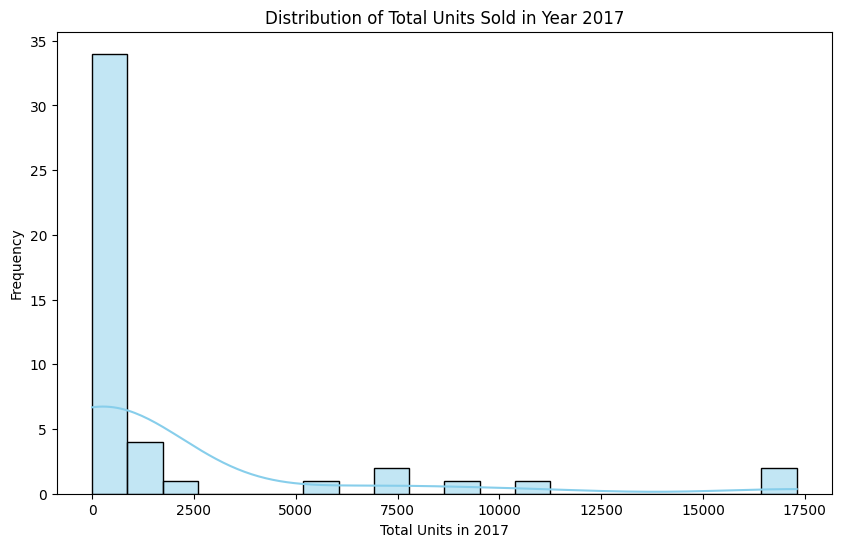

In [30]:
# Filter rows for sales in the year 2017
sales_2017 = df[df['SALE DATE'].dt.year == 2017]

# Group by 'BUILDING CLASS CATEGORY' and calculate total units in 2017
total_units_2017 = sales_2017.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(total_units_2017, kde=True, bins=20, color='skyblue')
plt.xlabel('Total Units in 2017')
plt.ylabel('Frequency')
plt.title('Distribution of Total Units Sold in Year 2017')
plt.show()

CONFINDENCE INTERVALS

Mengonstruksikan Confidence Intervals untuk rata-rata luas tanah di wilayah Queens

In [31]:
df.groupby("BOROUGH").agg({"LAND SQUARE FEET": [np.mean, np.std, np.size]})

C:\Users\acer\AppData\Local\Temp\ipykernel_25768\3278337749.py:1: FutureWarning: The provided callable <function mean at 0x000001BCE4ABAB90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("BOROUGH").agg({"LAND SQUARE FEET": [np.mean, np.std, np.size]})
C:\Users\acer\AppData\Local\Temp\ipykernel_25768\3278337749.py:1: FutureWarning: The provided callable <function std at 0x000001BCE4ABACB0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby("BOROUGH").agg({"LAND SQUARE FEET": [np.mean, np.std, np.size]})


LAND SQUARE FEET                     
                           mean           std   size
BOROUGH                                             
Bronx               3909.012725  18371.742462   6994
Brooklyn            2046.266868   8941.376313  23491
Manhattan           4068.408436   3749.426377  14150
Queens              3981.478175  31543.665502  18314
Staten Islands      8016.970839  94701.713480   5985

Mengambil parameter yang diperlukan hanya untuk wilayah Queens dan menghitung standard error serta lower class boundary dan upper boundary class dengan confidence level 95% (z = 1.96)

In [32]:
mean_Queens = 3981.4 # mean LAND SQUARE FEET of Manhattan
sd = 31543.6 # standard deviation for Manhattan
n = 18314 # Total number of Manhattan
z = 1.96 #z-score from the z table mentioned before

Di sini 1.96 adalah z-score untuk confidence level 95%.

Calculate the standard error using the formula for the standard error of the mean

In [33]:
se = sd / np.sqrt(n)

In [34]:
lcb = mean_Queens - z* se  #lower limit of the CI
ucb = mean_Queens + z* se  #upper limit of the CI
lcb, ucb

(3524.547797182293, 4438.252202817707)

Hal ini berarti bahwa true mean untuk harga jual pada wilayah Queens berada diantara 3919.6211774921403 dan 4043.17882250786

HYPOTHESIS TESTING

Apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1900-2000 dan tahun 2001 ke atas?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1900-2000 dan tahun 2001 ke atas)

H1 (Alternative Hypothesis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1900-2000 dan tahun 2001 ke atas)

Mengambil dua kolom dari dataset yaitu COMMERCIAL UNITS dan YEAR BUILT dan menampilkan lima baris pertama dari data yang dipilih. Ini akan menampilkan kolom "COMMERCIAL UNITS" dan "YEAR BUILT" untuk lima entri pertama dalam dataset.

In [35]:
dx = df[['COMMERCIAL UNITS','YEAR BUILT']]

dx.head()

,COMMERCIAL UNITS,YEAR BUILT
0,0,1900
3,0,1913
4,0,1900
6,0,1920
9,0,1920


Pertama-tama mengonversi kolom "YEAR BUILT" dari dataset df ke tipe data integer dan menyimpannya dalam DataFrame dx. Kemudian, kode tersebut menghasilkan DataFrame dx1 yang berisi entri yang memenuhi kondisi bahwa tahun pembangunan ("YEAR BUILT") berada di antara tahun 1900 dan 2000, dan menampilkan lima baris pertama dari data yang sesuai.

Ini akan menampilkan lima entri pertama dari properti yang dibangun antara tahun 1900 dan 2000 dalam dataset.

In [36]:
dx['YEAR BUILT'] = df["YEAR BUILT"].astype("int")

dx1 = dx[
    (dx['YEAR BUILT'] >= 1900) &
    (dx['YEAR BUILT'] <= 2000)]

dx1.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_25768\2685576696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['YEAR BUILT'] = df["YEAR BUILT"].astype("int")


,COMMERCIAL UNITS,YEAR BUILT
0,0,1900
3,0,1913
4,0,1900
6,0,1920
9,0,1920


Membuat DataFrame dx2 yang berisi entri yang memenuhi kondisi bahwa tahun pembangunan ("YEAR BUILT") lebih dari tahun 2001, dan kemudian menampilkan lima baris pertama dari data yang sesuai.

Ini akan menampilkan lima entri pertama dari properti yang dibangun setelah tahun 2001 dalam dataset.

In [37]:
dx2 = dx[(dx['YEAR BUILT'] > 2001)]

dx2.head()

,COMMERCIAL UNITS,YEAR BUILT
11,0,2009
73,0,2005
95,0,2014
100,0,2014
104,0,2014


In [38]:
n1 = len(dx1)
mu1 = dx1['COMMERCIAL UNITS'].mean()
sd1 = dx1['COMMERCIAL UNITS'].std()

(n1, mu1, sd1)

(52466, 0.19399229977509244, 10.176668279360321)

In [39]:
n2 = len(dx2)
mu2 = dx2['COMMERCIAL UNITS'].mean() 
sd2 = dx2['COMMERCIAL UNITS'].std()

(n2, mu2, sd2)

(9657, 0.11639225432328881, 4.557616683406427)

In [40]:
sm.stats.ztest(dx1['COMMERCIAL UNITS'], dx2['COMMERCIAL UNITS'], alternative='two-sided')

(0.7358736243945116, 0.4618076100741757)

Dalam kasus ini, karena p-value (0.462) lebih besar dari alpha (0.05), maka kita gagal untuk menolak hipotesis nol (H0). Ini berarti tidak ada cukup bukti statistik yang mendukung perbedaan signifikan dalam jumlah unit komersial antara properti yang dibangun antara tahun 1900-2000 dan properti yang dibangun setelah tahun 2001.

Dengan kata lain, berdasarkan hasil uji ini, tidak ada cukup bukti untuk menyatakan bahwa ada perbedaan yang signifikan dalam jumlah unit komersial antara kedua kelompok tersebut.

KESELURUHAN ANALISIS DATA

In [41]:
# Filter data untuk hanya menyertakan penjualan pada tahun 2017
sales_2017 = df[df['SALE DATE'].dt.year == 2017]

# Kelompokkan data berdasarkan 'BUILDING CLASS CATEGORY' dan hitung total unit terjual
total_units_2017 = sales_2017.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum()

# Tampilkan total unit terjual per kategori kelas bangunan pada tahun 2017
print(total_units_2017)

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                          9516
02 TWO FAMILY DWELLINGS                         17287
03 THREE FAMILY DWELLINGS                        7031
04 TAX CLASS 1 CONDOS                             912
05 TAX CLASS 1 VACANT LAND                         41
06 TAX CLASS 1 - OTHER                             14
07 RENTALS - WALKUP APARTMENTS                  17302
08 RENTALS - ELEVATOR APARTMENTS                10994
09 COOPS - WALKUP APARTMENTS                      357
10 COOPS - ELEVATOR APARTMENTS                   5853
11A CONDO-RENTALS                                1110
12 CONDOS - WALKUP APARTMENTS                     495
13 CONDOS - ELEVATOR APARTMENTS                  7054
14 RENTALS - 4-10 UNIT                           1852
15 CONDOS - 2-10 UNIT RESIDENTIAL                 727
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         54
17 CONDO COOPS                                     42
18 TAX CLASS 3 - UNTILITY PROPERTIES                0
21 O

Total Unit Terjual per Kategori Kelas Bangunan pada Tahun 2017 ? pada hasil diatas untuk total unit ONE FAMILY DWELLINGS berjumlah 9516 dan masih banyak lagi untuk total unit lainnya.

Berapa Confidence Intervals LAND SQUARE FEET di wilayah Queens ? Didapatkan Confidence Interval untuk rata-rata LAND SQUARE FEET di wilayah Manhattan berada di antara 3919.6211774921403 dan 4043.17882250786

Dilakukan pengujian hipotesis untuk menentukan apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1900-2000 dan tahun 2001 ke atas. Dari hasil pengujian hipotesis dengan tingkat signifikansi 5%, didapatkan bahwa terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 1900-2000 dengan properti yang dibangun pada tahun 2001 ke atas.

Data yang telah dibersihkan  dapat digunakan dan  dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya.